In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Read in and explore dataset

The dataset we're using today is classification.csv. Let's read it in, and create the X and y matrices from it.

In [13]:
df = pd.read_csv("datasets/classification.csv")
X = np.c_[df["age"], df["interest"]]
y = np.array(df["success"])

## Creating and plotting the training set

Let's create the train and test sets and take a look at the training set through a scatter plot. Does it seem reasonable that KNN will work on this task?

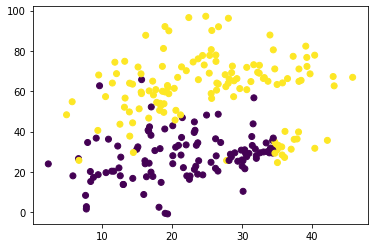

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

## How many neighbors should we use?

Let's split up our dataset further into a validation set.

In [15]:
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, random_state=27, test_size=0.125)

## Using validation to determine number of neighbors

Let's use the new validation set to help us pick the number of neighbors.

In [16]:
for k in range(1,16,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_subtrain, y_subtrain)
    y_predict = neigh.predict(X_val)
    print(k, accuracy_score(y_val, y_predict))

1 0.8666666666666667
3 0.9666666666666667
5 0.9666666666666667
7 0.9666666666666667
9 0.9666666666666667
11 0.9333333333333333
13 0.9
15 0.9


## Decision Boundaries

How do we make a decision boundary for our classifiers? Let's start with calculating the minimum and maximum values for our two dimensions (and give some padding on either side).

In [18]:
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1
y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1

1.3475599373326848 46.773728755936816


### Creating the meshgrid

We can use numpy's meshgrid() and arange() to build out a set of values to evaluate.

In [21]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

[[ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]
 [ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]
 [ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]
 ...
 [ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]
 [ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]
 [ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
  46.74755994]]
[ 1.34755994  1.44755994  1.54755994 ... 46.54755994 46.64755994
 46.74755994]


### Creating the set of values to predict from

We can use a combination of np.c_() and ravel() to build our new dataset we're going to evaluate.

In [23]:
new_X = np.c_[xx.ravel(), yy.ravel()]
print(len(new_X))

455455


### Predicting from our new dataset

Let's create the predictions from our classifier and reshape them appropriately.

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
new_y = neigh.predict(new_X)
print(new_y)

[0. 0. 0. ... 1. 1. 1.]


## Creating a contour map

Let's use contourf to draw a filled contour map and let's plot our training set on top.

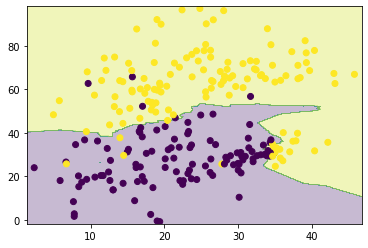

In [28]:
zz = new_y.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

## Changing number of neighbors

What happens to the decision boundary as you change the number of neighbors?

In [29]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
new_y = neigh.predict(new_X)

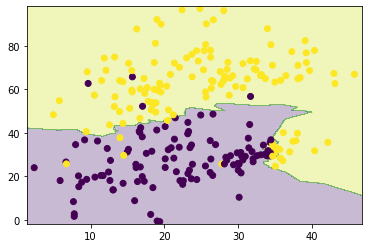

In [30]:
zz = new_y.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

## Confusion Matrices

We can also visualize information about how the classifier works with a confusion matrix.

In [31]:
from sklearn.metrics import confusion_matrix

y_predict = neigh.predict(X_train)
print(confusion_matrix(y_train, y_predict))

[[103   6]
 [  7 121]]
